In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("..\..\\assets\cleaned_data.csv")
df.head()

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10567498,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1050,Ixelles,Brussels Capital Region
1,10567435,apartment,loft,775000.0,258.0,2.0,2.0,1.0,NaN,3.0,...,NaN,2.0,1.0,7.0,Gas,Non flood zone,NaN,3020,Winksele,Flemish Brabant
2,10557731,apartment,apartment,99000.0,94.0,4.0,2.0,1.0,34.0,1.0,...,0.0,2.0,0.0,3.0,Gas,Non flood zone,Urban,4820,Dison,Liège
3,10567501,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1060,Saint-Gilles,Brussels Capital Region
4,10557727,apartment,apartment,219000.0,111.0,2.0,3.0,1.0,30.0,1.0,...,0.0,2.0,0.0,6.0,Gas,Non flood zone,Isolated,4680,Oupeye,Liège


How many rows and columns?

In [46]:
df.shape

(9341, 26)

What is the correlation between the variables and the price? (Why might that be?)

Which variables have the greatest influence on the price?

Which variables have the least influence on the price?

In [74]:
correlation = df.drop(columns=['id', 'surroundings', 'energy_class','basement', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality', 'province']) 
correlation_df = correlation.corr().round(2)
correlation_df["price"]

price            1.00
living_area      0.35
frontages        0.17
bedrooms         0.43
bathrooms        0.56
liv_room_surf    0.16
kitchen_type     0.23
showers          0.13
toilets          0.56
terrace          0.25
garden           0.07
elevator        -0.07
swimming_pool    0.28
status_build     0.18
furnished        0.00
Name: price, dtype: float64

How are variables correlated to each other? (Why?)

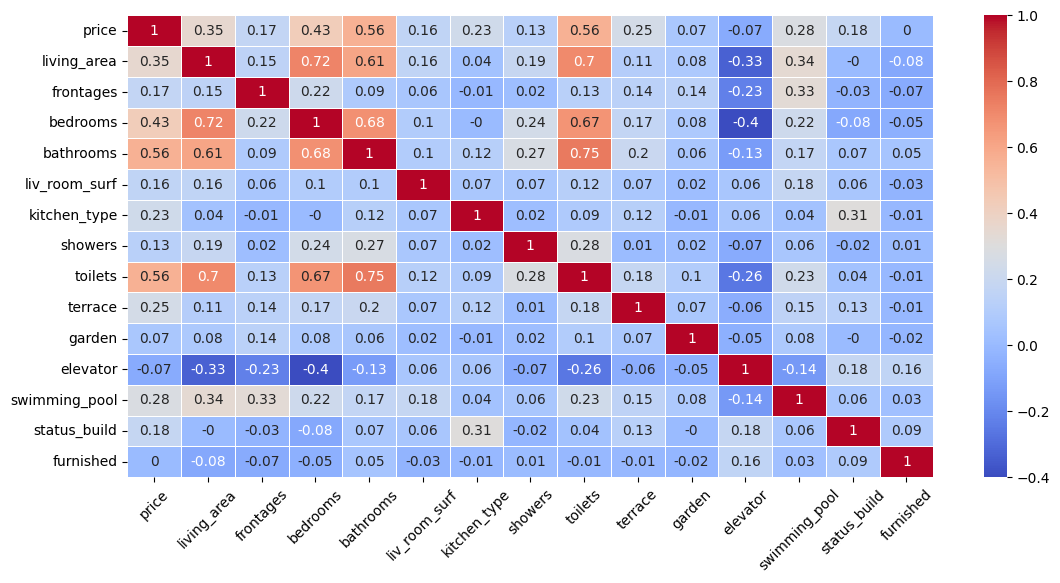

In [75]:
import seaborn as sns

correlation = df.drop(columns=['id', 'surroundings', 'energy_class','basement', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality', 'province']) 
correlation_df = correlation.corr().round(2)

plt.figure(figsize=(13, 6))
sns.heatmap(correlation_df, vmax=1, annot=True, linewidths=.7, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()

Percentage of missing values per column?

In [76]:
missing_values = df.isnull().mean()
missing_values.head()

id                  0.000000
building_type       0.000000
building_subtype    0.000000
price               0.003961
living_area         0.014131
dtype: float64

Plot the outliers.



<Axes: >

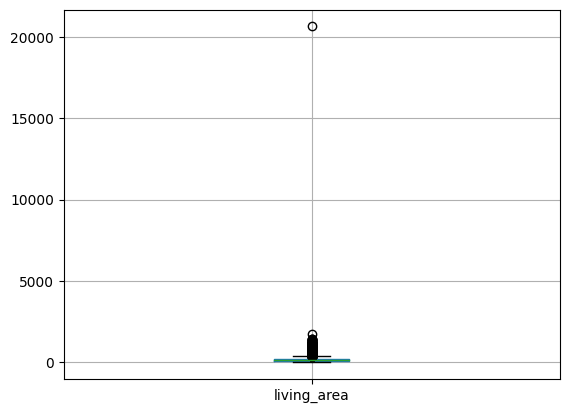

In [77]:
df.boxplot(column='living_area')

Which variables would you delete and why ?


Represent the number of properties according to their surface using a histogram.


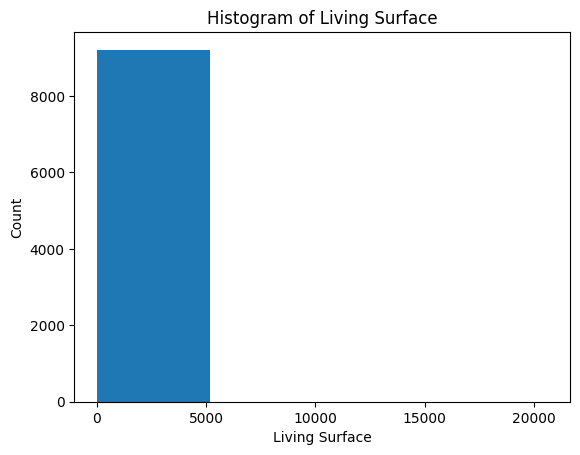

In [78]:

plt.hist(df['living_area'], bins=4)
plt.xlabel('Living Surface')
plt.ylabel('Count')
plt.title('Histogram of Living Surface')
plt.show()

In your opinion, which 5 variables are the most important and why?


What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)
What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)
What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)


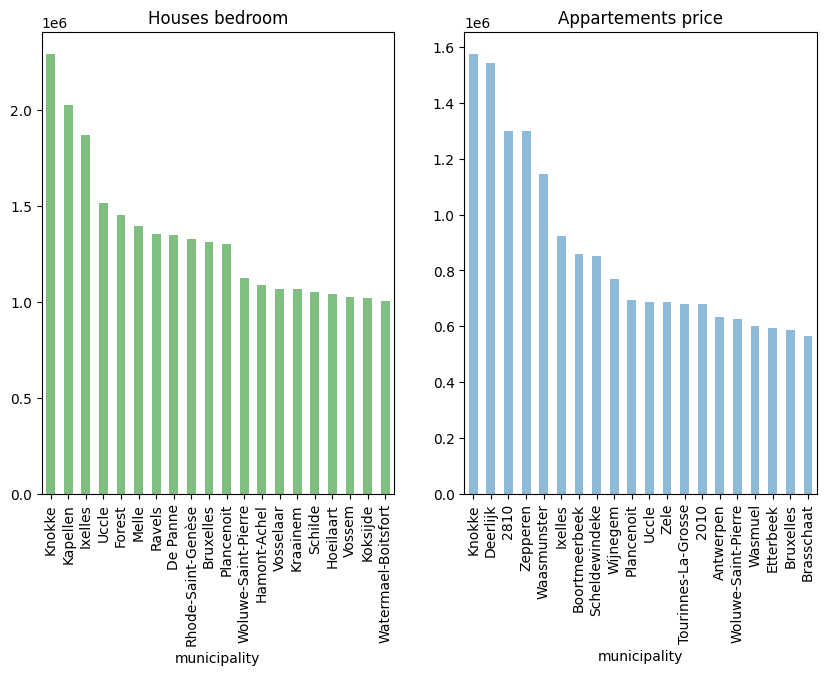

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))


df_houses = df[df['building_type'] == 'house']
df_appartments = df[df['building_type'] == 'apartment']
df_houses_price = df_houses.groupby('municipality')['price'].mean()
df_appartments_price = df_appartments.groupby('municipality')['price'].mean()
df_houses_price.nlargest(20).plot(kind ="bar", color = 'green' , alpha = 0.50, ax=ax1) 
ax1.set_title('Houses bedroom')
df_appartments_price.nlargest(20).plot(kind ="bar", alpha = 0.50, ax=ax2)
ax2.set_title('Appartements price')

plt.show()

What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)


Text(0.5, 1.0, 'Appartements price')

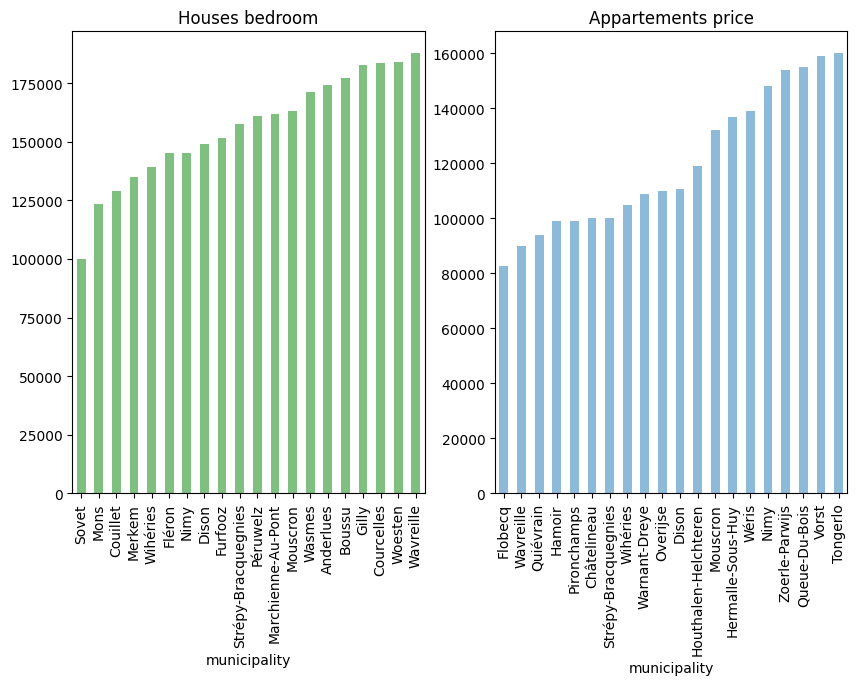

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))


df_houses = df[df['building_type'] == 'house']
df_appartments = df[df['building_type'] == 'apartment']
df_houses_price = df_houses.groupby('municipality')['price'].mean()
df_appartments_price = df_appartments.groupby('municipality')['price'].mean()
df_houses_price.nsmallest(20).plot(kind ="bar", color = 'green' , alpha = 0.50, ax=ax1) 
ax1.set_title('Houses bedroom')
df_appartments_price.nsmallest(20).plot(kind ="bar", alpha = 0.50, ax=ax2)
ax2.set_title('Appartements price')

What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)
What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)

Text(0.5, 1.0, 'Flanders Price')

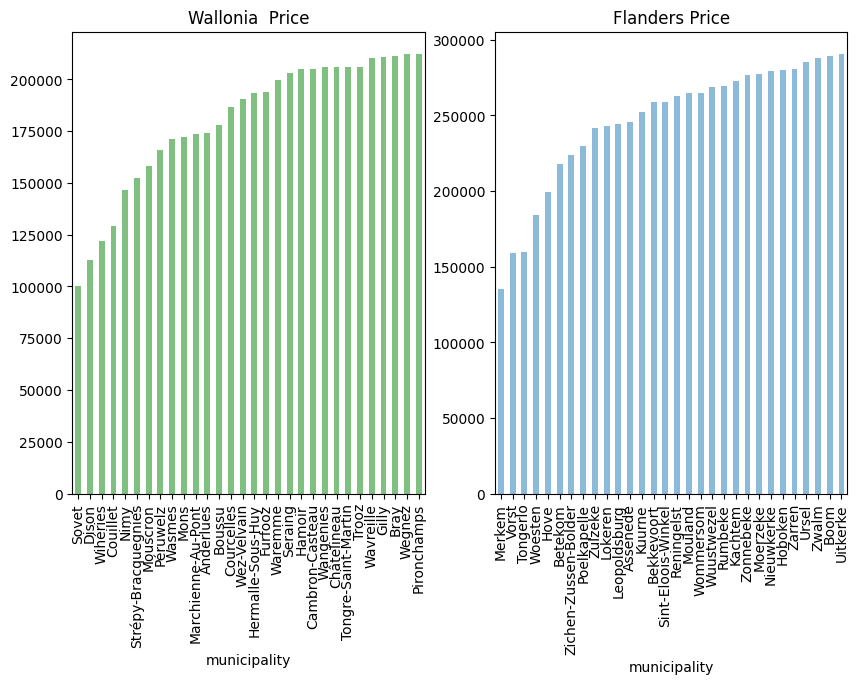

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))


df_wallonia = df[df['province'].isin(['Namur', 'Liège','Luxembourg','Walloon Brabant','Hainaut'])]
df_flanders = df[df['province'] .isin([ 'Limburg','Flemish Brabant','East Flanders','Antwerp','West Flanders'])]


df_houses_price = df_wallonia.groupby('municipality')['price'].mean()
df_appartments_price = df_flanders.groupby('municipality')['price'].mean()
df_houses_price.nsmallest(30).plot(kind ="bar", color = 'green' , alpha = 0.50, ax=ax1) 
ax1.set_title('Wallonia  Price')
df_appartments_price.nsmallest(30).plot(kind ="bar", alpha = 0.50, ax=ax2)
ax2.set_title('Flanders Price')

C:\Users\marco\AppData\Local\Temp\ipykernel_20788\1023911647.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_houses_wallonia = df_wallonia[df['building_type'] == 'house']
C:\Users\marco\AppData\Local\Temp\ipykernel_20788\1023911647.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_appartments_wallonia = df_wallonia[df['building_type'] == 'apartment']
C:\Users\marco\AppData\Local\Temp\ipykernel_20788\1023911647.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_houses_flanders = df_flanders[df['building_type'] == 'house']
C:\Users\marco\AppData\Local\Temp\ipykernel_20788\1023911647.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_appartments_flanders = df_flanders[df['building_type'] == 'apartment']


Text(0.5, 1.0, 'Flanders Price Appartement')

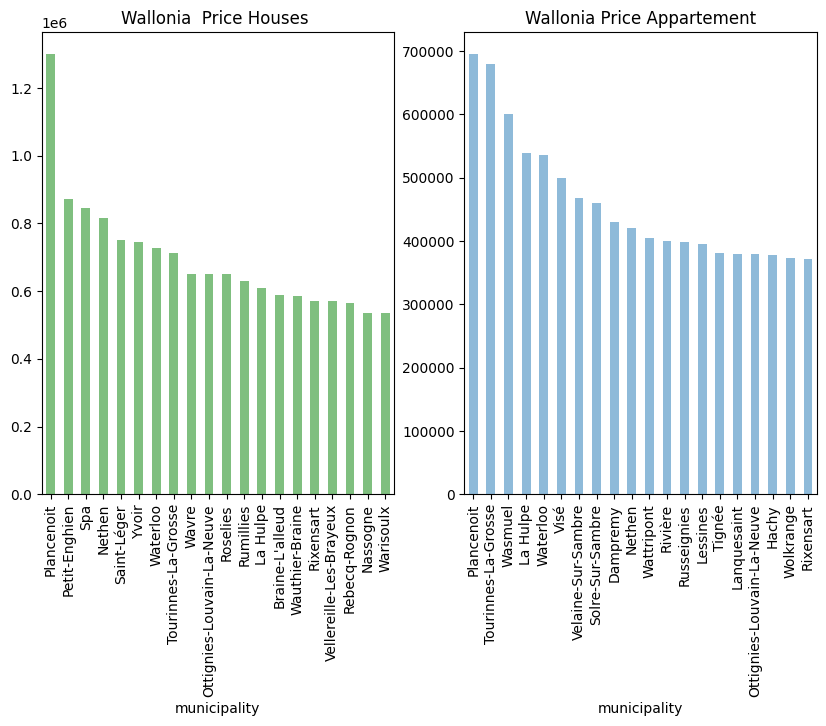

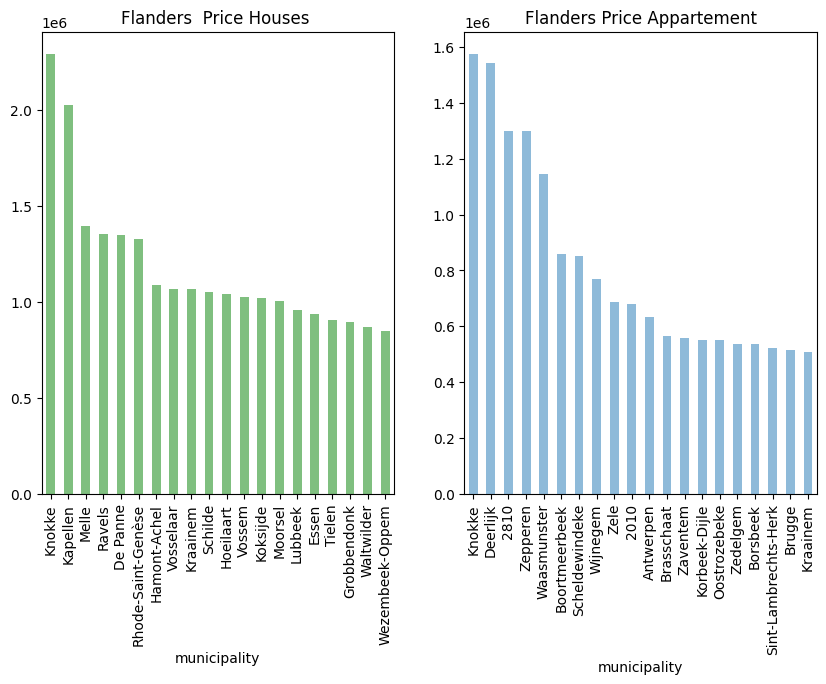

In [70]:
# Wallonia

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))


df_wallonia = df[df['province'].isin(['Namur', 'Liège','Luxembourg','Walloon Brabant','Hainaut'])]

df_houses_wallonia = df_wallonia[df['building_type'] == 'house']
df_appartments_wallonia = df_wallonia[df['building_type'] == 'apartment']

df_houses_price_wallonia = df_houses_wallonia.groupby('municipality')['price'].mean()
df_appartments_price_wallonia = df_appartments_wallonia.groupby('municipality')['price'].mean()


df_houses_price_wallonia.nlargest(20).plot(kind ="bar", color = 'green' , alpha = 0.50, ax=ax1) 
ax1.set_title('Wallonia  Price Houses ')
df_appartments_price.nlargest(20).plot(kind ="bar", alpha = 0.50, ax=ax2)
ax2.set_title('Wallonia Price Appartement')

# Flanders

df_flanders = df[df['province'] .isin([ 'Limburg','Flemish Brabant','East Flanders','Antwerp','West Flanders'])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))


df_houses_flanders = df_flanders[df['building_type'] == 'house']
df_appartments_flanders = df_flanders[df['building_type'] == 'apartment']

df_houses_price_flanders = df_houses_flanders.groupby('municipality')['price'].mean()
df_appartments_price_flanders = df_appartments_flanders.groupby('municipality')['price'].mean()


df_houses_price_flanders.nlargest(20).plot(kind ="bar", color = 'green' , alpha = 0.50, ax=ax1) 
ax1.set_title('Flanders  Price Houses ')
df_appartments_price_flanders.nlargest(20).plot(kind ="bar", alpha = 0.50, ax=ax2)
ax2.set_title('Flanders Price Appartement')



